In [2]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True)

In [3]:
data = pd.read_csv('population-and-demography.csv', delimiter=",")
df = data.copy()

In [4]:
# view our data
df.head()

,Country name,Year,Population,Population under 1 year,Population aged 0 to 4 years,Population aged 1 to 4 years,Population aged 5 to 9 years,Population aged 10 to 14 years,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years
0,Afghanistan,1950,7480464,301735.0,1248282,946547.0,966210,854363,757113,1241348,909953,661807,467170,271905,92691,9499,123,0.0
1,Afghanistan,1951,7571542,299368.0,1246857,947489.0,991791,866796,768616,1260904,922765,667015,468881,273286,94358,10155,118,0.0
2,Afghanistan,1952,7667534,305393.0,1248220,942827.0,1017993,878857,781411,1280288,935638,672491,470898,274852,96026,10721,139,0.0
3,Afghanistan,1953,7764549,311574.0,1254725,943151.0,1039950,891707,794308,1298803,948321,678064,472969,276577,97705,11254,166,0.0
4,Afghanistan,1954,7864289,317584.0,1267817,950233.0,1055592,907651,806216,1316768,961484,684153,475117,278210,99298,11793,190,0.0


First let's make the column names more pythonic

In [5]:
df.columns = pd.Series(df.columns).apply(lambda x: x.lower().replace(' ', '_'))
df

,country_name,year,population,population_under_1_year,population_aged_0_to_4_years,population_aged_1_to_4_years,population_aged_5_to_9_years,population_aged_10_to_14_years,population_aged_15_to_19_years,population_aged_20_to_29_years,population_aged_30_to_39_years,population_aged_40_to_49_years,population_aged_50_to_59_years,population_aged_60_to_69_years,population_aged_70_to_79_years,population_aged_80_to_89_years,population_aged_90_to_99_years,population_older_than_100_years
0,Afghanistan,1950,7480464,301735.0,1248282,946547.0,966210,854363,757113,1241348,909953,661807,467170,271905,92691,9499,123,0.0
1,Afghanistan,1951,7571542,299368.0,1246857,947489.0,991791,866796,768616,1260904,922765,667015,468881,273286,94358,10155,118,0.0
2,Afghanistan,1952,7667534,305393.0,1248220,942827.0,1017993,878857,781411,1280288,935638,672491,470898,274852,96026,10721,139,0.0
3,Afghanistan,1953,7764549,311574.0,1254725,943151.0,1039950,891707,794308,1298803,948321,678064,472969,276577,97705,11254,166,0.0
4,Afghanistan,1954,7864289,317584.0,1267817,950233.0,1055592,907651,806216,1316768,961484,684153,475117,278210,99298,11793,190,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17779,Zimbabwe,2017,14751101,464521.0,2287404,1822883.0,2090939,1839585,1690993,2422873,2021973,1088878,570769,467775,200927,59789,8974,222.0
17780,Zimbabwe,2018,15052191,466524.0,2283576,1817052.0,2156068,1851988,1732035,2474502,2058928,1155537,585529,476214,208587,59700,9299,228.0
17781,Zimbabwe,2019,15354606,468844.0,2281740,1812896.0,2203375,1882283,1759205,2546398,2085636,1220993,606266,479827,218763,60339,9546,235.0
17782,Zimbabwe,2020,15669663,470340.0,2287105,1816765.0,2229093,1932823,1776240,2640150,2101852,1291333,631541,476507,231604,61546,9629,240.0


on inspection of the country name column, i noticed that the data for countries, continents, and other demograhies are all lumped together, we'll have to seperate them to different dataframes

In [6]:
continents = ['Asia', 'Africa', 'North America', 'South America', 'Antarctica', 'Europe', 'Australia']

In [7]:
df_continents = df[df['country_name'].apply(lambda x: x in continents)]
df_continents.rename(columns = {'country_name': 'continent_name'}, inplace = True)
df_continents.head()

C:\Users\deauy\AppData\Local\Temp\ipykernel_5344\1932726143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continents.rename(columns = {'country_name': 'continent_name'}, inplace = True)


,continent_name,year,population,population_under_1_year,population_aged_0_to_4_years,population_aged_1_to_4_years,population_aged_5_to_9_years,population_aged_10_to_14_years,population_aged_15_to_19_years,population_aged_20_to_29_years,population_aged_30_to_39_years,population_aged_40_to_49_years,population_aged_50_to_59_years,population_aged_60_to_69_years,population_aged_70_to_79_years,population_aged_80_to_89_years,population_aged_90_to_99_years,population_older_than_100_years
72,Africa,1950,227549260,9393661.0,39066572,29672912.0,29653958,25792740,23087212,37677212,27422540,19586988,13178286,7893063,3445317,700903,43862,615.0
73,Africa,1951,232484000,9684508.0,40002510,30318004.0,30523140,26205760,23471334,38505124,28050804,19993920,13463632,8015908,3499692,709683,41884,602.0
74,Africa,1952,237586060,9921448.0,40967748,31046300.0,31460048,26651612,23855340,39329870,28694808,20406358,13754924,8147429,3558314,718430,40599,582.0
75,Africa,1953,242837440,10167668.0,42044940,31877272.0,32368278,27171188,24225864,40120050,29340532,20827816,14056554,8291982,3621039,728561,40087,557.0
76,Africa,1954,248244770,10409928.0,43258536,32848608.0,33192114,27802460,24585024,40875776,29989164,21257012,14365597,8451841,3685246,741198,40304,499.0


In [8]:
continent_population = df_continents.groupby(by='continent_name', as_index=False)['population'].sum().sort_values(by='population', ascending=False)
continent_population

,continent_name,population
1,Asia,214370725000
3,Europe,49312205250
0,Africa,46328023500
2,Australia,1167334351


not all continents are available, but asia is our obvious winner. Now Let's check the Total population By country

In [9]:
from pycountry import countries

country_names = [x.name for x in countries]

In [10]:
# find the names that are not in country_names
not_in = []
for name in df['country_name'].unique():
    if name in country_names:
        pass
    else:
        not_in.append(name)

checking the the values in not_in, there are some virgin-islands/overseas territory, we'll ignore those for this analysis.

there are other unrecognized/sanctioned territories like taiwan, Venezuela, kosovo, we'll add them to our analysis



In [11]:
rogue = ['Taiwan', 'South Korea', 'Syria', 'Tanzania', 'Palestine', 'North Korea', 'Moldova', 'Kosovo', 'Vietnam', 'Venezuela', 'Democratic Republic of Congo',
"Cote d'Ivoire", 'Cape Verde', 'Brunei', 'Bolivia', 'Iran', 'Laos', 'Micronesia (country)']

economic = ['Upper-middle-income countries', 'Lower-middle-income countries', 'Low-income countries', 'High-income countries']

In [12]:
df['country_name'] = df['country_name'].apply(lambda x: x.replace('Russia', 'Russian Federation'))
df['country_name'] = df['country_name'].apply(lambda x: x.replace('Timor', 'Timor-Leste'))

In [13]:
"Cote d'Ivoire" in country_names or "Cote d'Ivoire" in rogue

True

In [14]:
df_country = df[df['country_name'].apply(lambda x: x in country_names or x in rogue)]
df_country.head()

,country_name,year,population,population_under_1_year,population_aged_0_to_4_years,population_aged_1_to_4_years,population_aged_5_to_9_years,population_aged_10_to_14_years,population_aged_15_to_19_years,population_aged_20_to_29_years,population_aged_30_to_39_years,population_aged_40_to_49_years,population_aged_50_to_59_years,population_aged_60_to_69_years,population_aged_70_to_79_years,population_aged_80_to_89_years,population_aged_90_to_99_years,population_older_than_100_years
0,Afghanistan,1950,7480464,301735.0,1248282,946547.0,966210,854363,757113,1241348,909953,661807,467170,271905,92691,9499,123,0.0
1,Afghanistan,1951,7571542,299368.0,1246857,947489.0,991791,866796,768616,1260904,922765,667015,468881,273286,94358,10155,118,0.0
2,Afghanistan,1952,7667534,305393.0,1248220,942827.0,1017993,878857,781411,1280288,935638,672491,470898,274852,96026,10721,139,0.0
3,Afghanistan,1953,7764549,311574.0,1254725,943151.0,1039950,891707,794308,1298803,948321,678064,472969,276577,97705,11254,166,0.0
4,Afghanistan,1954,7864289,317584.0,1267817,950233.0,1055592,907651,806216,1316768,961484,684153,475117,278210,99298,11793,190,0.0


In [15]:
country_population = df_country.groupby(by='country_name', as_index=False)['population'].sum().sort_values(by='population', ascending=False)
country_population

,country_name,population
40,China,74558278410
90,India,59733897450
216,United States,17419120520
91,Indonesia,12066166396
27,Brazil,9831047940
...,...,...
140,Nauru,590609
211,Tuvalu,580989
172,Saint Pierre and Miquelon,417490
148,Niue,239422


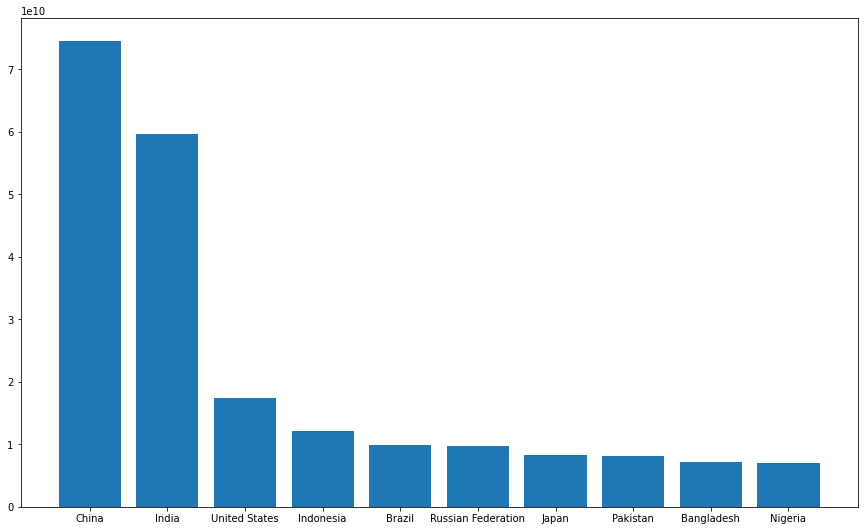

In [16]:
plt.figure(figsize=(15,9))
plt.bar(x='country_name', height='population', data=country_population.head(10))
plt.show()

we can see the top ten countries by population. personally i'm suprised that Russia is not next to the US in population, and Japan has more population than Nigeria? i'm beginning to doubt this data set. let's make sure some countries didn't submit more data than others. e.g Japan providing data for 7 years and Nigeria providing data for just 5 years

In [17]:
np.unique(np.array(df_country['country_name']), return_counts=True)

(array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
        'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
        'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
        'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
        'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
        'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
        'Canada', 'Cape Verde', 'Cayman Islands',
        'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
        'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
        'Croatia', 'Cuba', 'Cyprus', 'Czechia',
        'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
        'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
        'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
        'Fiji', 'Finland', 'France', 'French Guiana', 'Fre

Okay now i'm sure about our data integrity. let's see how the population is trending for different countries

In [18]:
population_trend = df_country.groupby(by=['country_name', 'year'])['population'].sum()
population_trend.head()

country_name  year
Afghanistan   1950    7480464
              1951    7571542
              1952    7667534
              1953    7764549
              1954    7864289
Name: population, dtype: int64

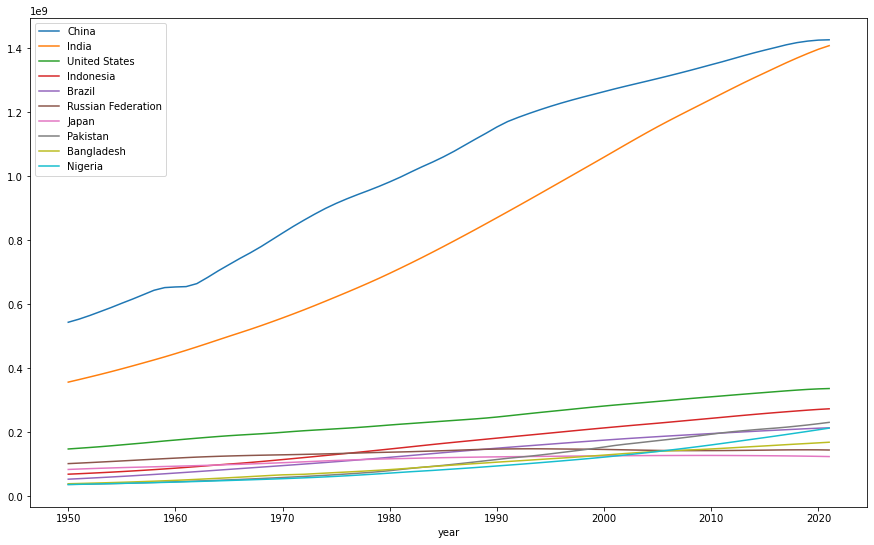

In [19]:
plt.figure(figsize=(15,9))
for country in country_population['country_name'][:10]:
    sns.lineplot(x=getattr(population_trend,country).index, y=getattr(population_trend,country).values, markers=True)
plt.legend(country_population['country_name'][:10])
plt.show()

It's hard to see but the population of japan is declining, while the populations of india, nigeria, and indonesia are growing strongly. now lets create columns for a more comprehensive age groups

In [20]:
df_country['kid_population'] = df_country['population_aged_5_to_9_years'] + df_country['population_aged_1_to_4_years'] + df_country['population_aged_0_to_4_years']
df_country['puberty_&_teenage_population'] = df_country['population_aged_15_to_19_years'] + df_country['population_aged_10_to_14_years']
df_country['young_adult_population'] = df_country['population_aged_30_to_39_years'] + df_country['population_aged_20_to_29_years']
df_country['middle_age_population'] = df_country['population_aged_50_to_59_years'] + df_country['population_aged_40_to_49_years']
df_country['older_population'] = df_country['population_older_than_100_years'] + df_country['population_aged_90_to_99_years'] + df_country['population_aged_80_to_89_years'] + df_country['population_aged_70_to_79_years'] + df_country['population_aged_60_to_69_years']
df_country.head()

C:\Users\deauy\AppData\Local\Temp\ipykernel_5344\3824569695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['kid_population'] = df_country['population_aged_5_to_9_years'] + df_country['population_aged_1_to_4_years'] + df_country['population_aged_0_to_4_years']
C:\Users\deauy\AppData\Local\Temp\ipykernel_5344\3824569695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['puberty_&_teenage_population'] = df_country['population_aged_15_to_19_years'] + df_country['population_aged_10_t

,country_name,year,population,population_under_1_year,population_aged_0_to_4_years,population_aged_1_to_4_years,population_aged_5_to_9_years,population_aged_10_to_14_years,population_aged_15_to_19_years,population_aged_20_to_29_years,...,population_aged_60_to_69_years,population_aged_70_to_79_years,population_aged_80_to_89_years,population_aged_90_to_99_years,population_older_than_100_years,kid_population,puberty_&_teenage_population,young_adult_population,middle_age_population,older_population
0,Afghanistan,1950,7480464,301735.0,1248282,946547.0,966210,854363,757113,1241348,...,271905,92691,9499,123,0.0,3161039.0,1611476,2151301,1128977,374218.0
1,Afghanistan,1951,7571542,299368.0,1246857,947489.0,991791,866796,768616,1260904,...,273286,94358,10155,118,0.0,3186137.0,1635412,2183669,1135896,377917.0
2,Afghanistan,1952,7667534,305393.0,1248220,942827.0,1017993,878857,781411,1280288,...,274852,96026,10721,139,0.0,3209040.0,1660268,2215926,1143389,381738.0
3,Afghanistan,1953,7764549,311574.0,1254725,943151.0,1039950,891707,794308,1298803,...,276577,97705,11254,166,0.0,3237826.0,1686015,2247124,1151033,385702.0
4,Afghanistan,1954,7864289,317584.0,1267817,950233.0,1055592,907651,806216,1316768,...,278210,99298,11793,190,0.0,3273642.0,1713867,2278252,1159270,389491.0


In [21]:
older_population = df_country.groupby(by='country_name', as_index=False)['older_population'].sum().sort_values(by='older_population', ascending = False)
older_population.head(10)

,country_name,older_population
40,China,7.402811e+09
90,India,4.265764e+09
216,United States,2.886969e+09
99,Japan,1.602159e+09
167,Russian Federation,1.450874e+09
72,Germany,1.205543e+09
91,Indonesia,8.765799e+08
215,United Kingdom,8.350516e+08
97,Italy,8.151481e+08
27,Brazil,7.985549e+08


display the top 10 older_population by country

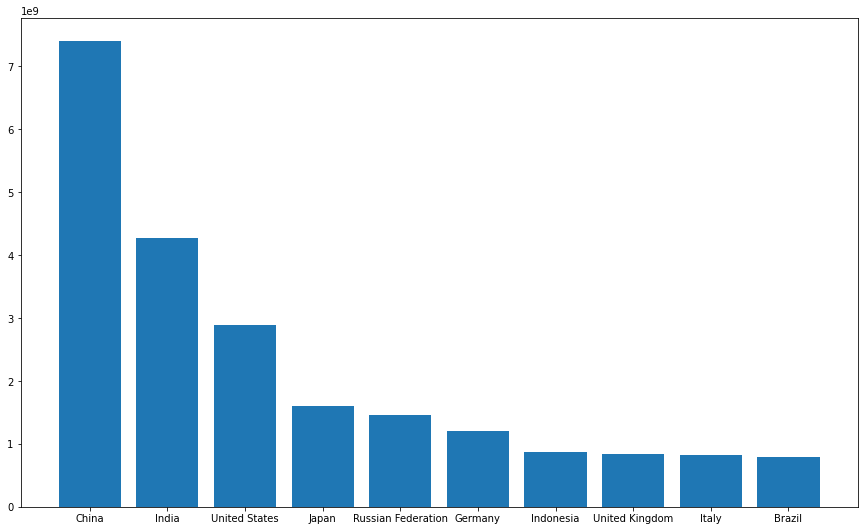

In [22]:
plt.figure(figsize=(15,9))
plt.bar(x='country_name', height='older_population', data=older_population.head(10))
plt.show()

now let's see how they trend

In [23]:
older_trend =df_country.groupby(by=['country_name', 'year'])['older_population'].sum()
older_trend.head()

country_name  year
Afghanistan   1950    374218.0
              1951    377917.0
              1952    381738.0
              1953    385702.0
              1954    389491.0
Name: older_population, dtype: float64

In [24]:
getattr(older_trend,country).index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='year')

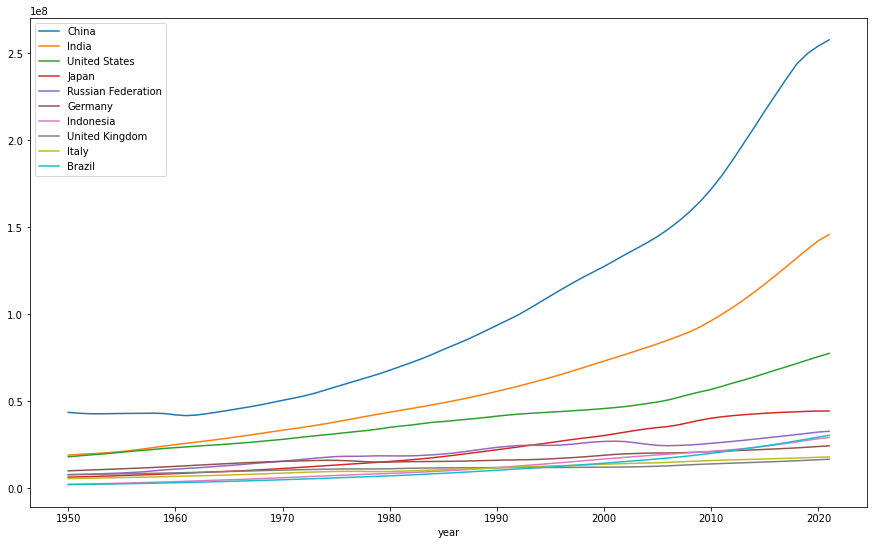

In [25]:
plt.figure(figsize=(15,9))
for country in older_population['country_name'][:10]:
    sns.lineplot(x=getattr(older_trend,country).index, y=getattr(older_trend,country).values, markers=True)
plt.legend(list(older_population['country_name'][:10]))
plt.show()

china and india are always on top. japan's older population on the other hand has been almost constant. okay enough of the general analysis, let's dive deep into japan's population data

In [26]:
japan_data = df_country[df_country['country_name']=='Japan'].reset_index()
japan_data.head()

,index,country_name,year,population,population_under_1_year,population_aged_0_to_4_years,population_aged_1_to_4_years,population_aged_5_to_9_years,population_aged_10_to_14_years,population_aged_15_to_19_years,...,population_aged_60_to_69_years,population_aged_70_to_79_years,population_aged_80_to_89_years,population_aged_90_to_99_years,population_older_than_100_years,kid_population,puberty_&_teenage_population,young_adult_population,middle_age_population,older_population
0,7776,Japan,1950,84353060,2438047.0,11365000,8926953.0,9661580,8819623,8735658,...,4069510,1898580,443629,25684,153.0,29953533.0,17555281,24627550,14706088,6437556.0
1,7777,Japan,1951,85683470,2147233.0,11663234,9516001.0,9392610,8928539,8825961,...,4143850,1962848,456816,27447,166.0,30571845.0,17754500,25226498,15055503,6591127.0
2,7778,Japan,1952,86921760,1986074.0,11426507,9440433.0,9468421,9109688,8876300,...,4220842,2036451,473445,29648,183.0,30335361.0,17985988,25857232,15423043,6760569.0
3,7779,Japan,1953,88057140,1860046.0,10706438,8846392.0,9955176,9334792,8845070,...,4305296,2107015,487328,31292,199.0,29508006.0,18179862,26498521,15786012,6931130.0
4,7780,Japan,1954,89093016,1754120.0,9868557,8114437.0,10515747,9574780,8749775,...,4399868,2174821,503699,32606,216.0,28498741.0,18324555,27129201,16143746,7111210.0


first let's see the change in population for every year in our data

In [27]:
# find the change in population per year
count = 1
diff = []
for num in japan_data['population'].index:
    if count > 1:
        diff.append(japan_data['population'][num] - japan_data['population'][num-1])
    else:
        diff.append(0)
    count += 1

In [28]:
population_growth = pd.Series(diff)
japan_data['population_growth'] = population_growth

In [29]:
japan_data['population_growth'].tail(15)

57    104254
58     71206
59     39410
60    -11610
61    -98174
62   -153566
63   -174770
64   -202190
65   -225794
66   -257076
67   -331400
68   -406590
69   -464190
70   -546920
71   -632230
Name: population_growth, dtype: int64

wow the japanese population is shrinking rapidly. as you can see japan has been experiencing negative growth for the past 12 years...let me visualize that

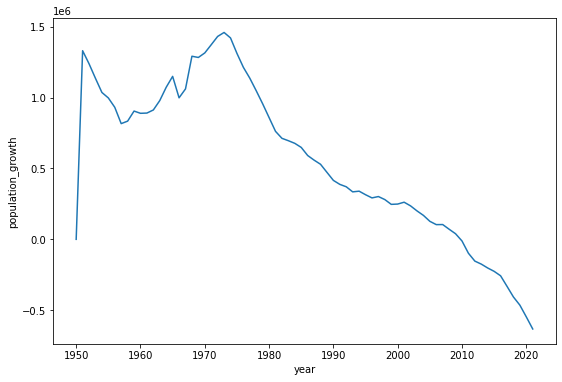

In [30]:
plt.figure(figsize=(9,6))
sns.lineplot(x='year', y='population_growth', data=japan_data[1:])
plt.show()

now let's see how the different age_groups are trending

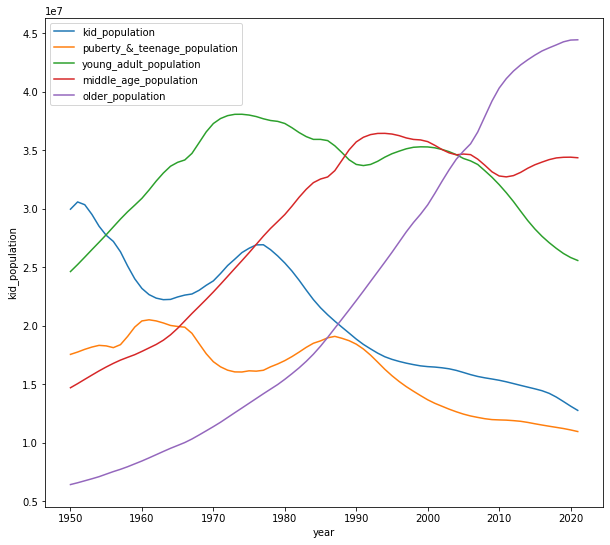

In [31]:
age_groups = ['kid_population', 'puberty_&_teenage_population', 'young_adult_population', 'middle_age_population', 'older_population']
plt.figure(figsize=(10,9))
for age_group in age_groups:
    temp = japan_data.groupby(by=['year'], as_index=False)[age_group].sum()
    sns.lineplot(x=temp['year'], y=temp[age_group])
plt.legend(age_groups)
plt.show()

the older population increased exponentially, and is the highest. this signifies low death rates. the low puberty-age and child population signifies low birth rates, and the down trend, signifies even lower birth rates to come. i consider this an existensial threat to japan!